In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
!git clone https://github.com/maxogden/cats.git


Cloning into 'cats'...
remote: Enumerating objects: 630, done.
remote: Total 630 (delta 0), reused 0 (delta 0), pack-reused 630
Receiving objects: 100% (630/630), 98.33 MiB | 37.94 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
!git clone https://github.com/ardamavi/Dog-Cat-Classifier.git

Cloning into 'Dog-Cat-Classifier'...
remote: Enumerating objects: 1654, done.
remote: Total 1654 (delta 0), reused 0 (delta 0), pack-reused 1654
Receiving objects: 100% (1654/1654), 34.83 MiB | 32.10 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "/content/cats"

CATEGORIES = ["cat_photos"]
IMG_SIZE = 100

In [ ]:
training_data = []
Labels = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = 1  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)
                
                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
                #data augmentation (mirror)

                new_array=cv2.flip(img_array, 1)
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)

                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 195/195 [00:02<00:00, 65.30it/s]

780


In [ ]:
CATEGORIES = ["catmapper"]
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = 1  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)
                
                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
                #data augmentation (mirror)

                new_array=cv2.flip(img_array, 1)
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)

                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 345/345 [00:04<00:00, 84.02it/s]

2160


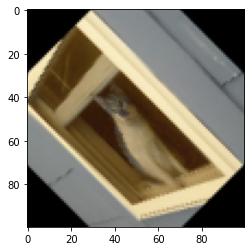

In [ ]:
exambe=7
plt.imshow(training_data[exambe])
plt.show()


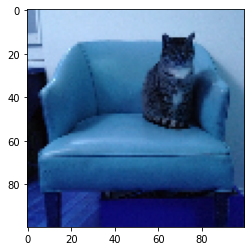

In [ ]:
exambe=16
plt.imshow(training_data[exambe])
plt.show()

In [ ]:
DATADIR = "/content/Dog-Cat-Classifier/Data/Train_Data"

CATEGORIES = ["dog"]


def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = 0  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)
                
                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
                #data augmentation (mirror)

                new_array=cv2.flip(img_array, 1)
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                Labels.append(class_num)

                #data augmentation (rottating)
                (h, w) = new_array.shape[:2]
                (cX, cY) = (w // 2, h // 2)
                # rotate our image by 45 degrees around the center of the image
                M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
                rotated = cv2.warpAffine(new_array, M, (w, h))
                training_data.append(rotated)  # add this to our training_data
                Labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 699/699 [00:02<00:00, 291.02it/s]

4956


<BarContainer object of 2 artists>

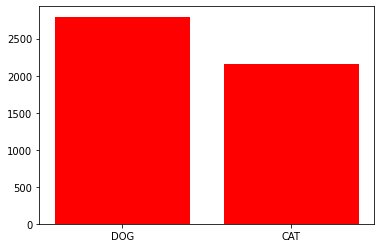

In [ ]:
import pandas as pd
df=pd.DataFrame()
df["image"]=training_data
df["Labels"]=Labels
plt.figure()

plt.bar(['DOG', 'CAT'], [len(df[df["Labels"]==0]),len(df[df["Labels"]==1])], color='r')


In [ ]:
df["Labels"].unique()

array([1, 0])

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(df["image"], df["Labels"], random_state = 3)

In [ ]:
del [df]

<BarContainer object of 4 artists>

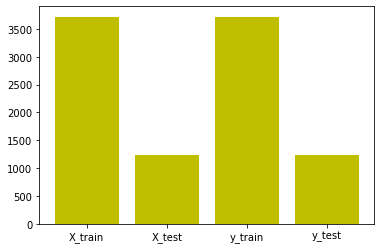

In [ ]:
plt.figure()
xvals = range(len([len(X_train), len(X_test), len(y_train), len(y_test)]))
plt.bar(['X_train', 'X_test', 'y_train', 'y_test'], [len(X_train), len(X_test), len(y_train), len(y_test)], color='y')


In [ ]:
X=tf.convert_to_tensor(list(X_train.values))

In [ ]:
y=y_train.values

In [ ]:
X.dtype

tf.int32

class : 1


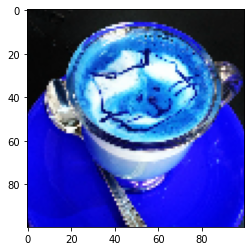

class : 1


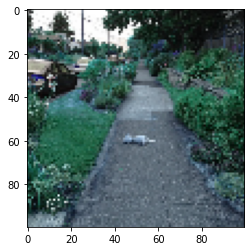

class : 1


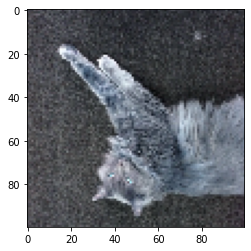

class : 1


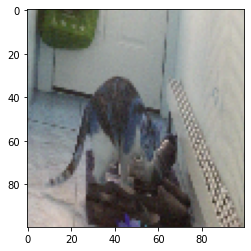

class : 1


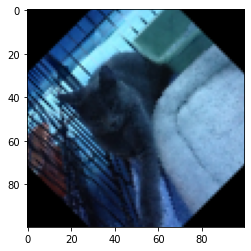

class : 0


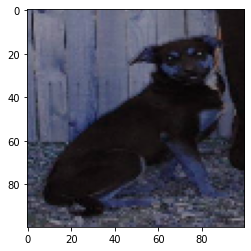

class : 0


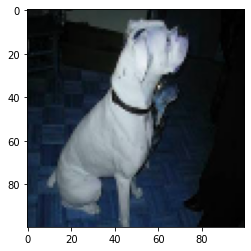

class : 1


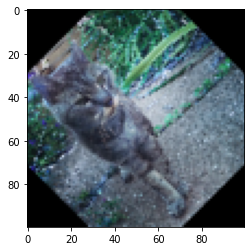

class : 0


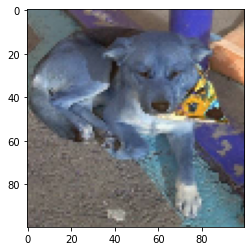

class : 0


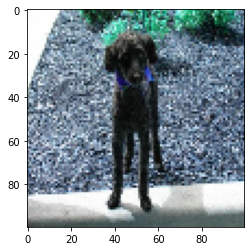

class : 0


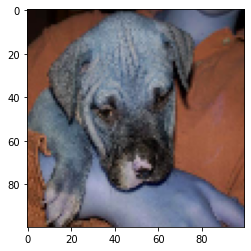

class : 0


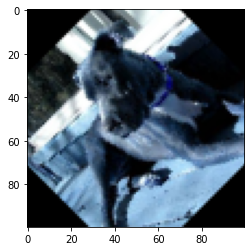

class : 0


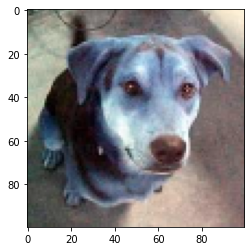

class : 1


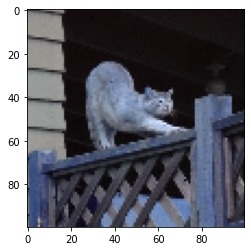

class : 0


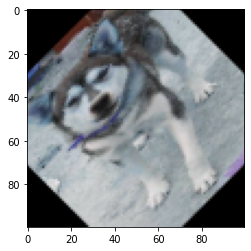

class : 0


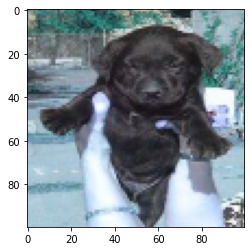

class : 1


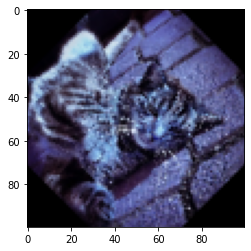

class : 0


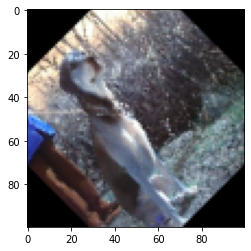

class : 0


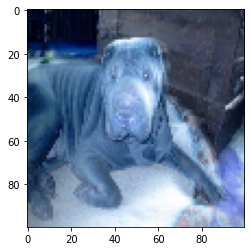

class : 0


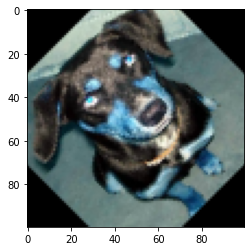

In [ ]:
for exambe in range(20):
  print("class :",y[exambe])
  plt.imshow(X[exambe])
  plt.show()
    

Ok, it seems like we have got so bad data set

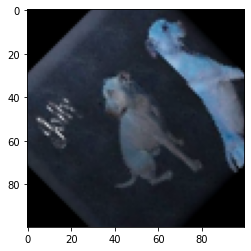

In [ ]:
exambe=50
plt.imshow(X[exambe])
plt.show()
    

# My mode

In [ ]:
X_norm=X/255

In [ ]:

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 activation (Activation)     (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                        

In [ ]:
model.fit(X_norm,y, batch_size=24, epochs=50, validation_split=0.2)

Epoch 1/50
124/124 [==============================] - 4s 35ms/step - loss: 0.6936 - accuracy: 0.5476 - val_loss: 0.6827 - val_accuracy: 0.5685
Epoch 2/50
124/124 [==============================] - 4s 30ms/step - loss: 0.6863 - accuracy: 0.5594 - val_loss: 0.6762 - val_accuracy: 0.5685
Epoch 3/50
124/124 [==============================] - 4s 30ms/step - loss: 0.6864 - accuracy: 0.5547 - val_loss: 0.6756 - val_accuracy: 0.5685
Epoch 4/50
124/124 [==============================] - 4s 30ms/step - loss: 0.6857 - accuracy: 0.5543 - val_loss: 0.6746 - val_accuracy: 0.5685
Epoch 5/50
124/124 [==============================] - 4s 31ms/step - loss: 0.6832 - accuracy: 0.5644 - val_loss: 0.6865 - val_accuracy: 0.5497
Epoch 6/50
124/124 [==============================] - 4s 30ms/step - loss: 0.6887 - accuracy: 0.5540 - val_loss: 0.6781 - val_accuracy: 0.5685
Epoch 7/50
124/124 [==============================] - 4s 30ms/step - loss: 0.6829 - accuracy: 0.5597 - val_loss: 0.6697 - val_accuracy: 0.5685

.

the model have Overfittting  problem but the val_accuracy is just NAH..acceptable.

I think that main reason is the poor data set 

# My model Testing

In [ ]:
X_test_norm=X_test/255


In [ ]:
# A few random samples
use_samples = list(range(0,20))
samples_to_predict = []
samples_stat=[]
# Generate plots for samples 
for sample in use_samples:
    # Add sample to array for prediction
    samples_to_predict.append(X_test_norm.iloc[sample])
    samples_stat.append(y_test.iloc[sample])

In [ ]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(20, 100, 100, 3)


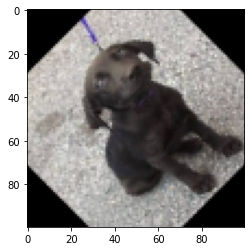

dog
____________________________________________________


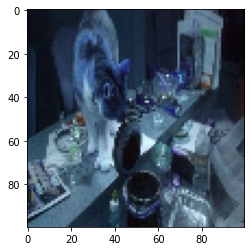

dog
____________________________________________________


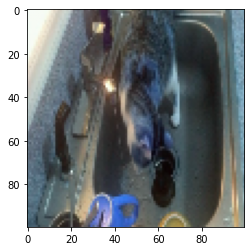

dog
____________________________________________________


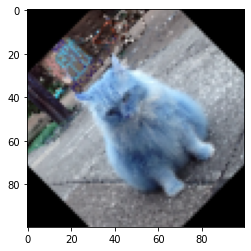

Cat
____________________________________________________


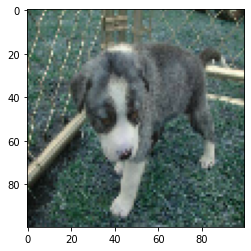

dog
____________________________________________________


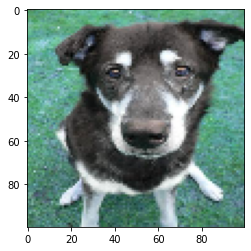

dog
____________________________________________________


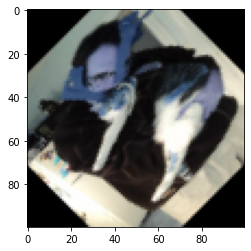

dog
____________________________________________________


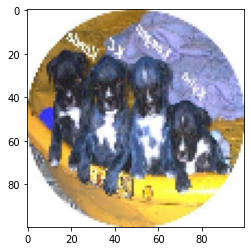

dog
____________________________________________________


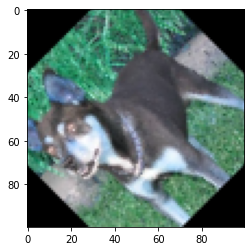

dog
____________________________________________________


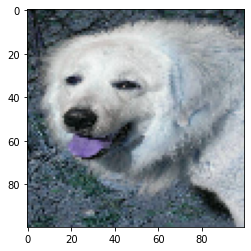

Cat
____________________________________________________


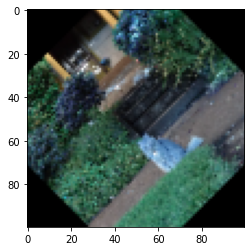

Cat
____________________________________________________


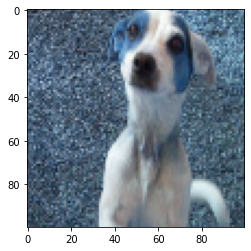

dog
____________________________________________________


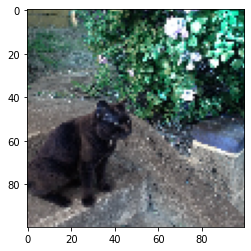

Cat
____________________________________________________


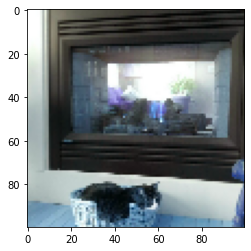

Cat
____________________________________________________


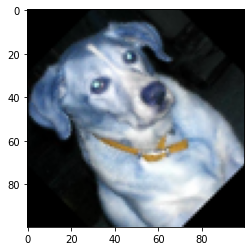

dog
____________________________________________________


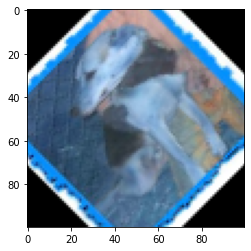

dog
____________________________________________________


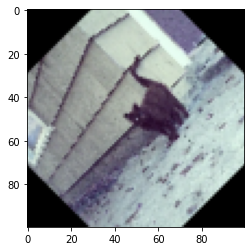

Cat
____________________________________________________


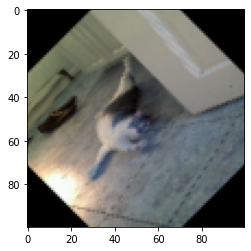

dog
____________________________________________________


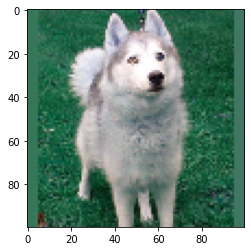

dog
____________________________________________________


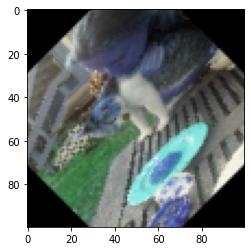

dog
____________________________________________________


In [ ]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
counter=0;
for  prediction in predictions:
    #print('The right value is ',samples_stat[counter])
    plt.imshow(samples_to_predict[counter])
    plt.show()
    counter=counter+1;
    if prediction>0.5:
        print("Cat")
    else: 
        print("dog")
    print("____________________________________________________")

In [ ]:
XTest=tf.convert_to_tensor(list(X_test.values))

In [ ]:
predictions_list = model.predict(XTest)
predictions_list

array([[0.       ],
       [1.       ],
       [0.       ],
       ...,
       [0.9998149],
       [0.       ],
       [1.       ]], dtype=float32)

In [ ]:
myList = np.rint(predictions_list)
len(myList)

1239

In [ ]:
mistakesIndex=[]
for i in range(len(myList)):
    if not(myList[i]==y_test.values[i]):
        mistakesIndex.append(i)
    
len(mistakesIndex)

372

In [ ]:
print('ERROR: ',(len(mistakesIndex)/len(myList))*100)

ERROR:  30.024213075060537


## Let's see some mistakes

Note!!
0=>Dog
1=>Cat
right value: 1
Predection: 0


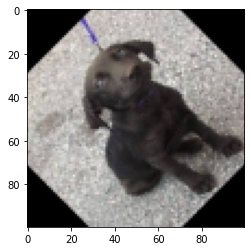

right value: 0
Predection: 1


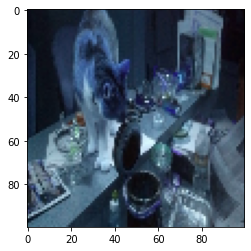

right value: 1
Predection: 0


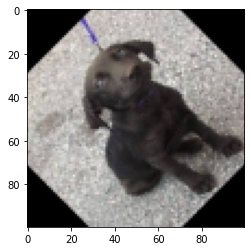

right value: 0
Predection: 1


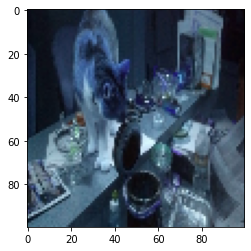

right value: 1
Predection: 0


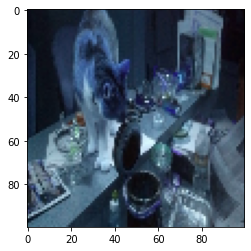

right value: 1
Predection: 0


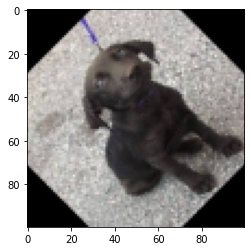

right value: 1
Predection: 0


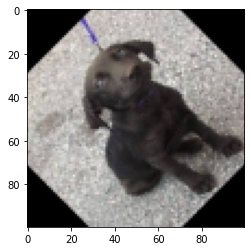

right value: 1
Predection: 0


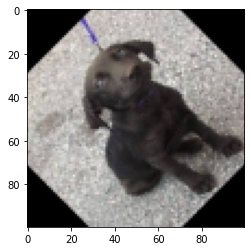

In [ ]:
number_of_ex=8
print("Note!!")
print("0=>Dog")
print("1=>Cat")
for i in range(0,number_of_ex):
    print("right value:",y_test.values[mistakesIndex[i]])
    print("Predection:",int(myList[mistakesIndex[i]]))
    plt.imshow(XTest[int(myList[i])])
    plt.show()
    